In [23]:
import pde
import phasesep as ps
import numpy as np
import random
import tracker
import matplotlib.pyplot as plt

In [7]:
# load data
fields = []
archive = "/net/theorie/rocks/ole.berendes/data/170222-SIM10/SIM10_263119.10_crossed_states.npz"
for i in range(len(archive)):
    arr = np.load(archive, allow_pickle=True)[f"arr_{i}"]
    fields.append(arr.item())

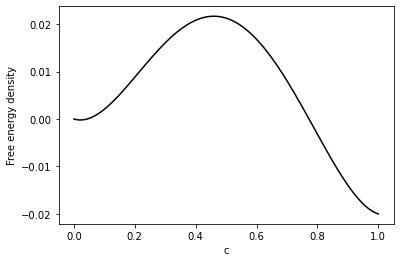

In [2]:
f_scale = 1
f_slope = -0.02
f_offset = 0

f = ps.GinzburgLandau2Components(
    prefactor=f_scale,
    slope=f_slope,
    offset=f_offset
)
f.plot()

In [4]:
kappa = 1
diffusive_mobility = 1
noise_diffusion = 2/30

eq = ps.CahnHilliardExtendedPDE(
    {
        "free_energy": f,
        "kappa": kappa,
        "mobility": diffusive_mobility,
        "noise_diffusion": noise_diffusion
    }
)
eq.cache_rhs = True

In [11]:
grid = fields[0].grid

  0%|          | 0/1000.0 [00:00<?, ?it/s]

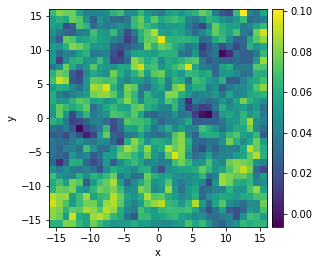

In [27]:
dt = 1e-3
t_end = 1e3

initial_state = random.choice(fields)

opar = tracker.DropletMaterialTracker(op_max=100, op_min=-1, ncrossings=1, history=True)
storage = pde.MemoryStorage(field_obj=initial_state, write_mode="truncate_once")
prog = pde.ProgressTracker()
stor = storage.tracker()
plot = pde.PlotTracker(interval=10, show=True)
final = eq.solve(
        state=initial_state,
        t_range=t_end,
        tracker=[stor, prog, opar],
        method="explicit",
        dt=dt
    )
final.plot()

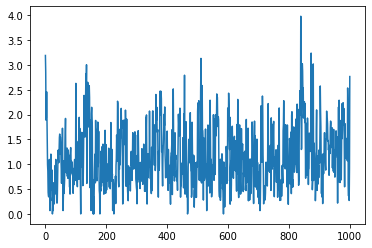

In [28]:
plt.plot(opar.op_history)

In [ ]:
ini